# **Imports**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, SpectralEmbedding
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, davies_bouldin_score

# **Pre-Processing**

In [10]:
random_state = 1000
df = pd.read_csv("derma.csv")

In [11]:
# Some rows on the age column are marked as "?" and therefore need to be removed from the dataset
condition = (df['age'] == '?')
df = df[~condition]
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [12]:
df = df.dropna()

In [14]:
y = df['class']
X = df.drop('class', axis=1)

In [15]:
# Mapping the categories-diseases based on their integer values

category_mapping = {
    1: "psoriasis",
    2: "seborrheic dermatitis",
    3: "lichen planus",
    4: "pityriasis rosea",
    5: "chronic dermatitis",
    6: "pityriasis rubra pilaris"
}

y = y.map(category_mapping)

**Scaling data**

In [16]:
scale = StandardScaler()
X_sc = scale.fit_transform(X)

# **t-SNE and Spectral Embedding**

In [17]:
# t-SNE
tsne = TSNE(n_jobs=-1, random_state=random_state)
X_tsne = tsne.fit_transform(X_sc)

In [18]:
# Spectral Embedding
spectral_embedding = SpectralEmbedding(n_jobs=-1, random_state=random_state, affinity="nearest_neighbors")
X_spectral = spectral_embedding.fit_transform(X_sc)

**Plotting the data after t-SNE/Spectral Embedding**

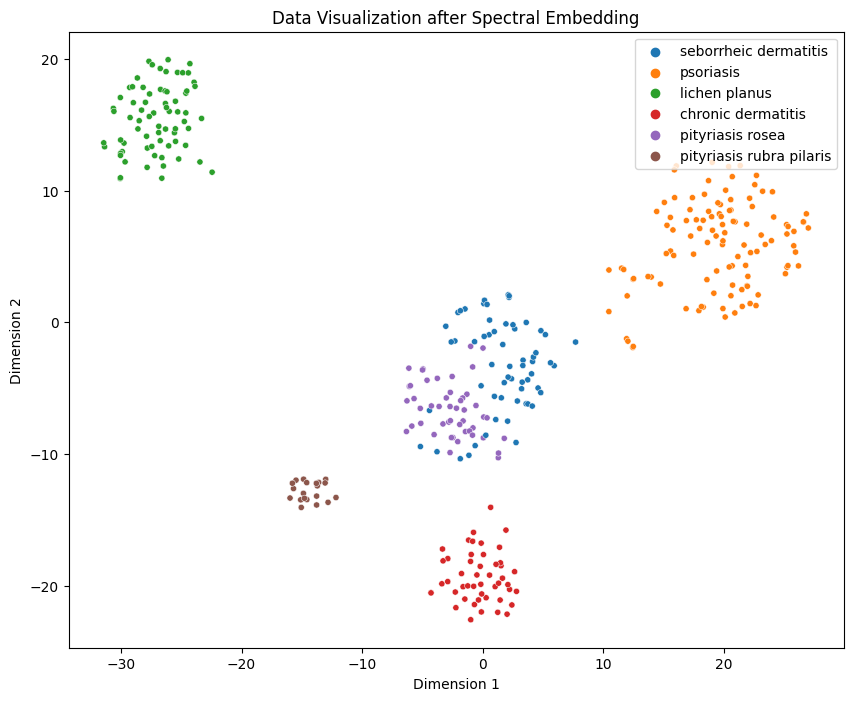

In [19]:
df_embed = pd.DataFrame(data={'X1': X_tsne[:, 0], 'X2': X_tsne[:, 1], 'Class': y})
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X1', y='X2', hue='Class', data=df_embed, palette='tab10', legend='full', s=20)
plt.title('Data Visualization after Spectral Embedding')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='upper right')
plt.show()

# **Performing Spectral Clustering**

In [ ]:
spectral_clustering = SpectralClustering(n_clusters = 6, random_state=random_state, affinity='nearest_neighbors', eigen_solver='lobpcg')
predictions = spectral_clustering.fit_predict(X_tsne)

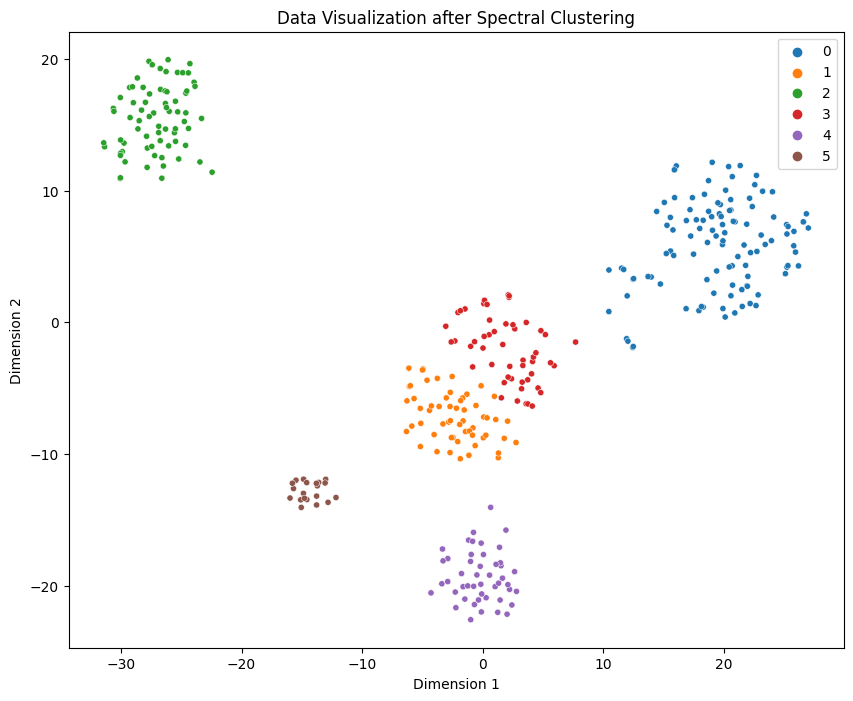

In [24]:
df_embed = pd.DataFrame(data={'X1': X_tsne[:, 0], 'X2': X_tsne[:, 1], 'Class': predictions})
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X1', y='X2', hue='Class', data=df_embed, palette='tab10', legend='full', s=20)
plt.title('Data Visualization after Spectral Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='upper right')
plt.show()

**Evaluating the clusters**

In [22]:
s_score = silhouette_score(X_tsne, predictions)
h_score = homogeneity_score(y, predictions)
c_score = completeness_score(y, predictions)
v_score = v_measure_score(y, predictions)
d_score = davies_bouldin_score(X_tsne, predictions)
print(s_score, h_score, c_score, v_score, d_score)

0.23195553 0.6773820578203618 0.8900226143916177 0.7692784904008716 0.8379649083436336
